<a href="https://colab.research.google.com/github/Kokila412/ML_internship/blob/main/copy_of_basicml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [56]:
# load the file
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')
df


,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [57]:
# dependent variable
y=df['logS']
y


,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [58]:
# independent variable
X=df.drop(['logS'],axis=1)
X


,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [59]:
# data splitting
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)



In [60]:
# training the model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [61]:
# accuracy
print("accuracy",lr.score(X_test,y_test)*100)

accuracy 74.18557723283169


In [62]:
# prediction of the input variables
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [63]:
# finding mean squared error and r2 score
from sklearn.metrics import mean_squared_error,r2_score
mse1=mean_squared_error(y_train,y_train_pred)
r2_score1=r2_score(y_train,y_train_pred)
mse2=mean_squared_error(y_test,y_test_pred)
r2_score2=r2_score(y_test,y_test_pred)
print(mse1,r2_score1,mse2,r2_score2)

0.9739672468155558 0.7765805143879706 1.161323117762489 0.7418557723283169


In [64]:
# results of mse and r2 score
lr_results=pd.DataFrame({'mse':[mse1,mse2],'r2_score':[r2_score1,r2_score2]},index=['train','test'])
lr_results

,mse,r2_score
train,0.973967,0.776581
test,1.161323,0.741856


In [65]:
# traning a different model on the same dataset
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [66]:
# accuracy of decisiontreeregressor on the dataset
print("accuracy",dt.score(X_test,y_test)*100)

accuracy 78.60147537854306


In [67]:
# prediction of input variables for dtregressor
dt_train_pred=dt.predict(X_train)
dt_test_pred=dt.predict(X_test)

In [68]:
# mse and r2 score of output variables
from sklearn.metrics import mean_squared_error,r2_score
rf_mse1=mean_squared_error(y_train,dt_train_pred)
rf_r2_score1=r2_score(y_train,dt_train_pred)
rf_mse2=mean_squared_error(y_test,dt_test_pred)
rf_r2_score2=r2_score(y_test,dt_test_pred)

In [69]:
rf_results=pd.DataFrame({'mse':[rf_mse1,rf_mse2],'r2_score':[rf_r2_score1,rf_r2_score2]},index=['train','test'])
rf_results

,mse,r2_score
train,0.021258,0.995124
test,0.962663,0.786015


In [70]:
# difference between linear regression and decision tree regressor
diff_models=pd.concat([lr_results,rf_results],axis=1)
diff_models

,mse,r2_score,mse,r2_score
train,0.973967,0.776581,0.021258,0.995124
test,1.161323,0.741856,0.962663,0.786015


In [71]:


new_cols = ['linear_mse', 'linear_r2_score', 'decision_tree_mse', 'decision_tree_r2_score']
diff_models_renamed = pd.DataFrame(diff_models.values, columns = new_cols)

# Display the updated DataFrame
diff_models_renamed


,linear_mse,linear_r2_score,decision_tree_mse,decision_tree_r2_score
0,0.973967,0.776581,0.021258,0.995124
1,1.161323,0.741856,0.962663,0.786015


Text(0.5, 1.0, 'Linear Regression Model Performance')

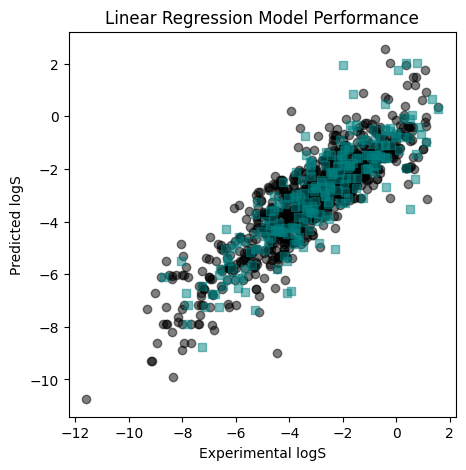

In [72]:
# performance of linear regression model on the dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(x=y_train,y=y_train_pred,c='black',marker='o',label='Training data',alpha=0.5)
plt.scatter(x=y_test,y=y_test_pred,c='teal',marker='s',label='Test data',alpha=0.5)
plt.xlabel('Experimental logS')
plt.ylabel('Predicted logS')
plt.title('Linear Regression Model Performance')

Text(0.5, 1.0, 'Decision Tree Regression Model Performance')

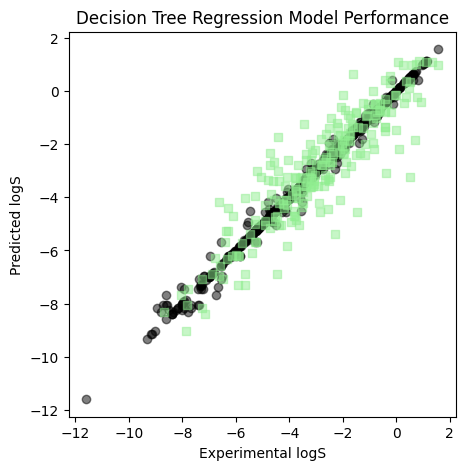

In [73]:
# performance of decision tree regression on the given dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(x=y_train,y=dt_train_pred,c='black',marker='o',label='Training data',alpha=0.5)
plt.scatter(x=y_test,y=dt_test_pred,c='lightgreen',marker='s',label='Test data',alpha=0.5)
plt.xlabel('Experimental logS')
plt.ylabel('Predicted logS')
plt.title('Decision Tree Regression Model Performance')